In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

Questions to answer:
    - what variable is the most significant to predict the house prices?
    - how location affects house prices? (zipcodes)
    - homes with a large lot vs homes with a large sqft of the home?
    - how does waterfront homes affect the price? (assumption: small waterfront homes are incredibly expensive)
    - look at the price vs date: is the market growing?
    - extra: take the rows where renovation data exists and see how it affect the price based on the subset

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
type(df.waterfront.loc[0])

numpy.float64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Obvious things to do: turn 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19f97048>,
      dtype=object)

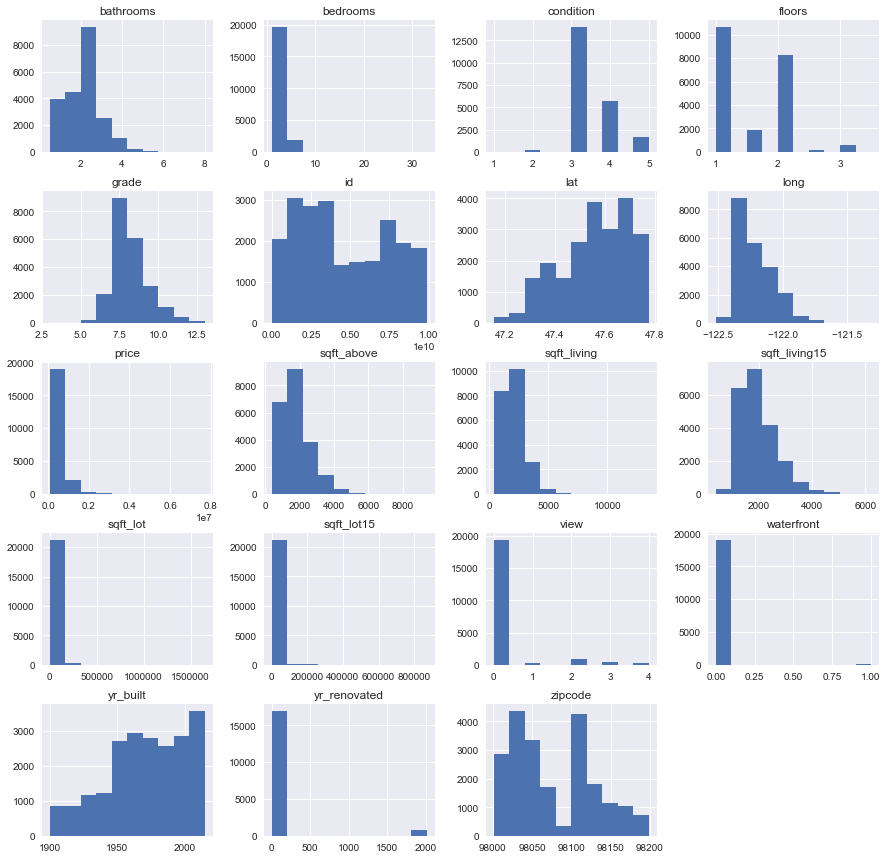

In [7]:
df.hist(figsize=(15, 15))

In [8]:
#pd.plotting.scatter_matrix(df, figsize=(20, 20));

1 step: remove lat and long as locations reserach will be conducted on the basis of zip codes

In [9]:
df = df.drop(['lat', 'long'], axis=1)

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

we assume that view is not relevant for house prices --> remove view column

In [11]:
df = df.drop(['view'], axis=1)

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

remove id --> not a predictor

In [13]:
df = df.drop(['id'], axis=1)

deal with year renovated column: the percentage of existing data on renovation year is too small compared to the size of data set: decided to drop the column for now

In [14]:
df = df.drop(['yr_renovated'], axis=1)

sqft basements needed to be converted to a float


In [15]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [16]:
#replaced '?' values with defference in sdft_living and sqft_above
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = df['sqft_living'] - df['sqft_above']


In [17]:
#convert strings to floats
df.sqft_basement = df.sqft_basement.apply(lambda x: float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 2.6+ MB


In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
df.corr()
df.corr().applymap(lambda x: True if abs(x)>0.75 else False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False


Make seaborn heatmap to check for multicollinearity

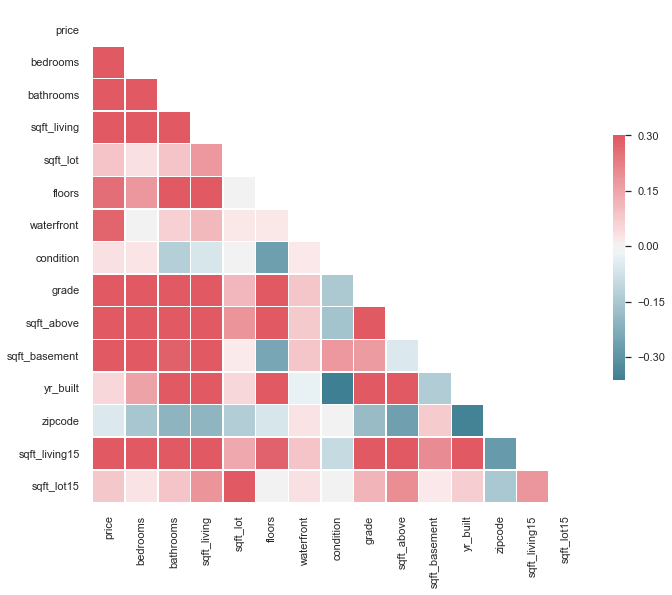

In [20]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We are going to do a linear regression plot looking for relationship besween lot sized and home sized. Is it more expensive a large lot or a large house?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


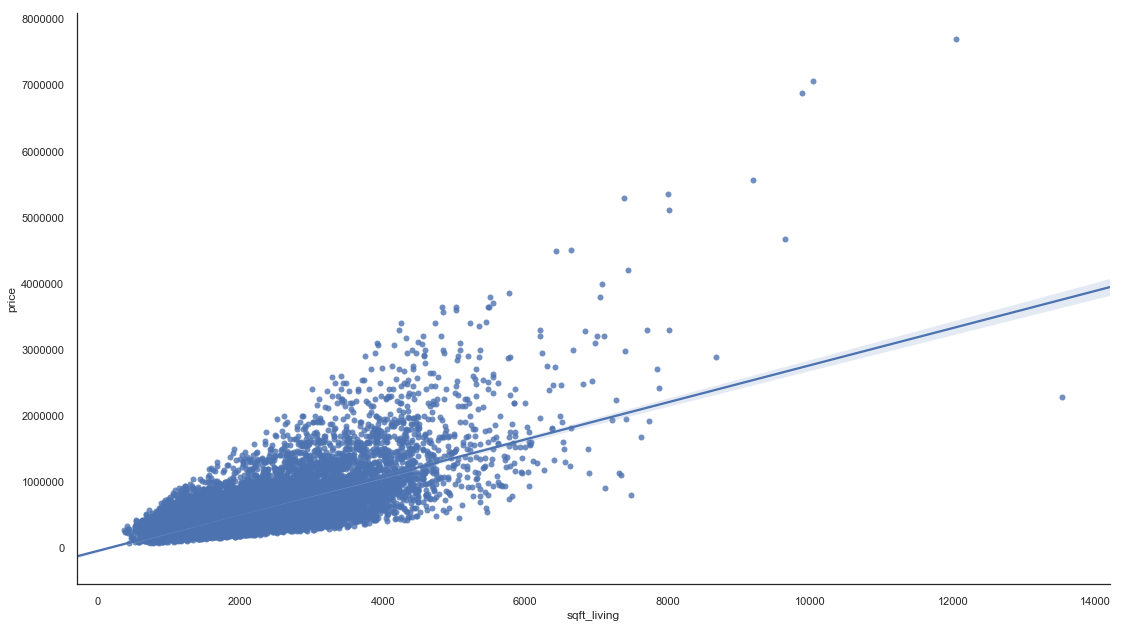

In [21]:
g = sns.regplot(df.sqft_living, df.price)
g.figure.set_size_inches(18.5, 10.5)
sns.despine()

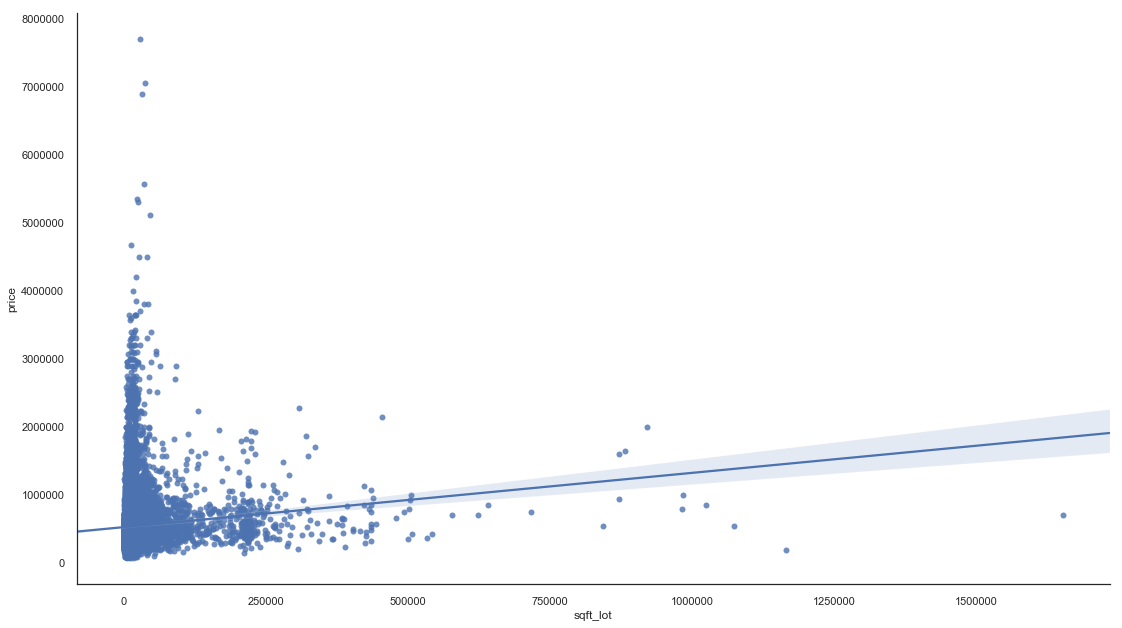

In [22]:
g = sns.regplot(df.sqft_lot, df.price)
g.figure.set_size_inches(18.5, 10.5)
sns.despine()

it seems that size of the lot doesn't have this much of an effect on the price comparing with sqft of the house

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

target = df.price
predictors = df.sqft_living
predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:33:47   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,1800,7503


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 2.6+ MB


clearly, one variable analysis is not enough to predict the price, as there may be other significant variables.
we will proceed to further clear the data to try to establish more correlations

we will convert floors variable into intereger

In [26]:
df.floors = df.floors.apply(lambda x: int(x))

now we will deal with waterfront that also has null values

In [27]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [28]:
df.waterfront.isna().sum()

2376

we decided to apply dummie variable for waterfont column removing those values where the data is missing

In [29]:
waterfront_dummies = pd.get_dummies(df["waterfront"], prefix="WF", )
df = df.drop(["waterfront"], axis=1)
df = pd.concat([df, waterfront_dummies], axis=1)

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,WF_0.0,WF_1.0
0,10/13/2014,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,1955,98178,1340,5650,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,1951,98125,1690,7639,1,0
2,2/25/2015,180000.0,2,1.00,770,10000,1,3,6,770,0.0,1933,98028,2720,8062,1,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,1965,98136,1360,5000,1,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,1987,98074,1800,7503,1,0


next step - convert year built to haw many years ago built

In [31]:
df['age'] = 2019 - df['yr_built']

In [32]:
df = df.drop(["yr_built"], axis=1)

last thing in preliminary data cleaning would be converting date to datetime instead of having it as an object. then we will see how many years ago it was sold

In [33]:
df.date = pd.to_datetime(df.date)
df['sold_y_ago'] = df.date.apply(lambda x: 2019 - x.year)
df = df.drop(["date"], axis=1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,WF_0.0,WF_1.0,age,sold_y_ago
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,98178,1340,5650,0,0,64,5
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,98125,1690,7639,1,0,68,5
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,98028,2720,8062,1,0,86,4
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,98136,1360,5000,1,0,54,5
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,98074,1800,7503,1,0,32,4


after the data is clened up, we will check if the distribution is normal

In [35]:
df.sold_y_ago.value_counts()

5    14622
4     6975
Name: sold_y_ago, dtype: int64

it looks like there is only 2 values, that can be converted to dummie variables

In [36]:
sold_y_ago_dummies = pd.get_dummies(df["sold_y_ago"], prefix="SOLD_AGO", )
df = df.drop(["sold_y_ago"], axis=1)
df = pd.concat([df, sold_y_ago_dummies], axis=1)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,WF_0.0,WF_1.0,age,SOLD_AGO_4,SOLD_AGO_5
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,98178,1340,5650,0,0,64,0,1
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,98125,1690,7639,1,0,68,0,1
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,98028,2720,8062,1,0,86,1,0
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,98136,1360,5000,1,0,54,0,1
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,98074,1800,7503,1,0,32,1,0


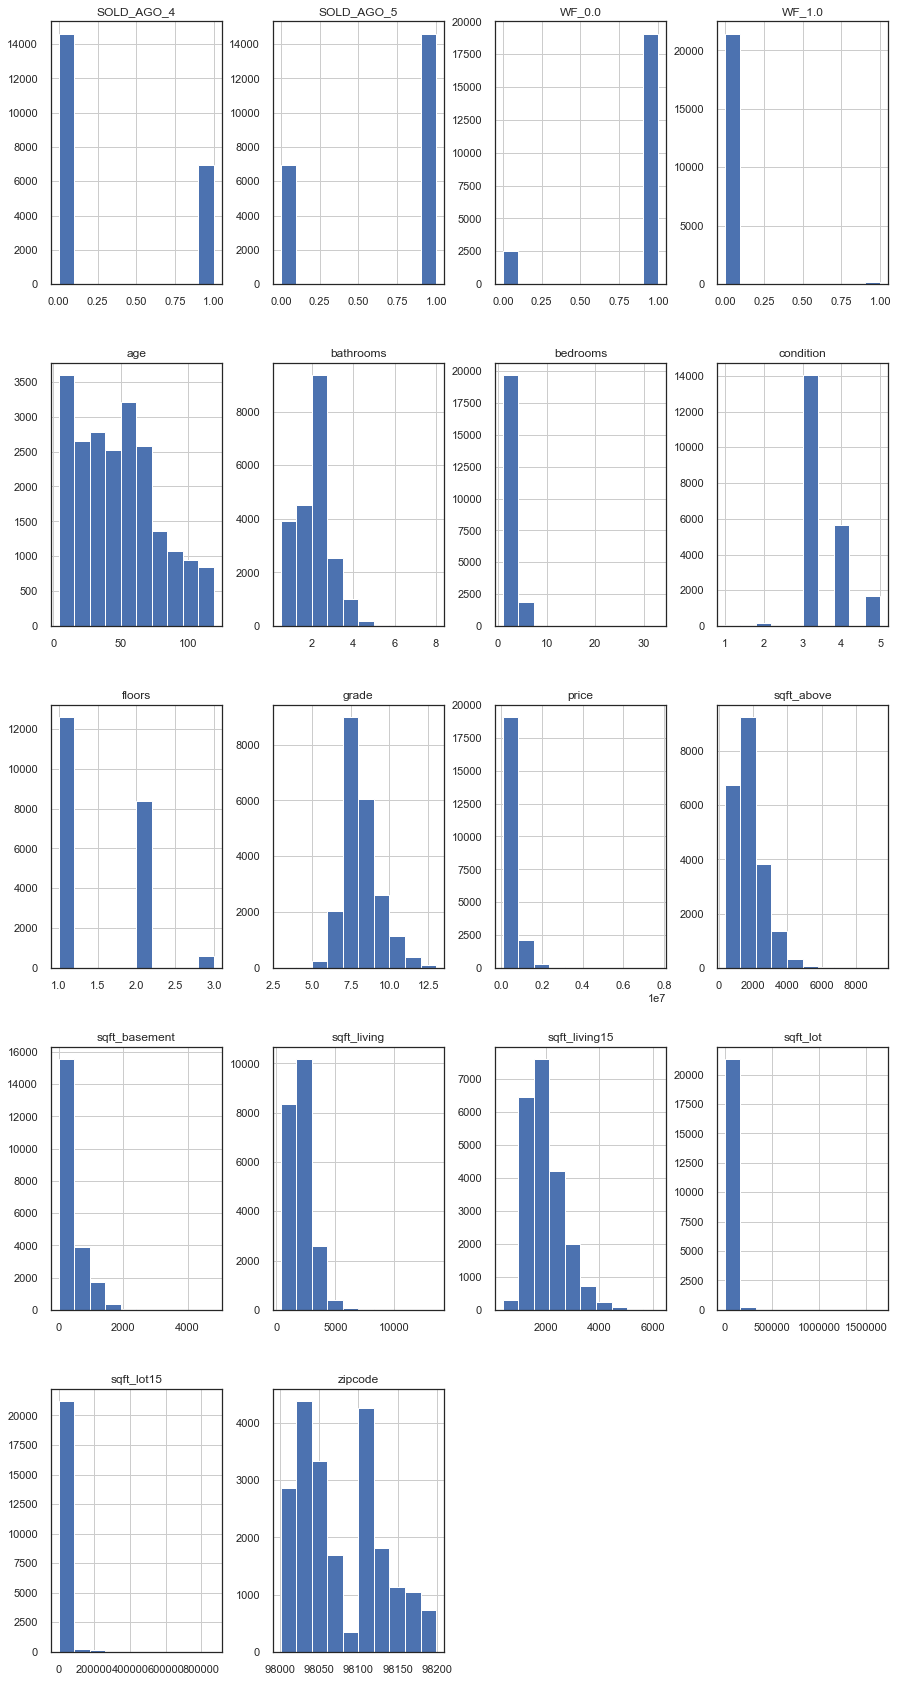

In [38]:
df.hist(figsize=(15,30));

After cleaning the data we will see if correlations and heatmap table looks any more clear

In [39]:
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,WF_0.0,WF_1.0,age,SOLD_AGO_4,SOLD_AGO_5
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.237264,0.036056,0.667951,0.605368,0.323799,-0.053402,0.585241,0.082845,-0.057305,0.264306,-0.053953,0.003727,-0.003727
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.158065,0.026496,0.356563,0.479386,0.302808,-0.154092,0.393406,0.030690,0.004858,-0.002127,-0.155670,-0.009949,0.009949
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.520922,-0.126479,0.665838,0.686668,0.283440,-0.204786,0.569884,0.088303,-0.011744,0.063629,-0.507173,-0.026577,0.026577
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353372,-0.059445,0.762779,0.876448,0.435130,-0.199802,0.756402,0.184342,-0.020362,0.104637,-0.318152,-0.029014,0.029014
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.008603,-0.008830,0.114731,0.184139,0.015418,-0.129586,0.144763,0.718204,-0.007191,0.021459,-0.052946,0.005628,-0.005628
floors,0.237264,0.158065,0.520922,0.353372,-0.008603,1.000000,-0.293463,0.473273,0.518037,-0.235793,-0.097146,0.296797,-0.012766,0.002295,0.018321,-0.578549,-0.019523,0.019523
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.293463,1.000000,-0.146896,-0.158904,0.173849,0.002888,-0.093072,-0.003126,-0.003639,0.016648,0.361592,-0.045898,0.045898
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.473273,-0.146896,1.000000,0.756073,0.168220,-0.185771,0.713867,0.120981,-0.013732,0.082818,-0.447865,-0.030635,0.030635
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.518037,-0.158904,0.756073,1.000000,-0.052156,-0.261570,0.731767,0.195077,-0.009043,0.071778,-0.424037,-0.023782,0.023782
sqft_basement,0.323799,0.302808,0.283440,0.435130,0.015418,-0.235793,0.173849,0.168220,-0.052156,1.000000,0.074725,0.200443,0.017550,-0.025322,0.082800,0.133064,-0.015706,0.015706


In [40]:
df.corr().applymap(lambda x: True if abs(x)>0.8 else False)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,WF_0.0,WF_1.0,age,SOLD_AGO_4,SOLD_AGO_5
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Based on correlation between variables (multicollinearity) we decided to drop those variables that have correlation levels greater than o.8 which is sqft_above/sqft_living. We removed sqft_above, as sqft_living had greater correlation coefficient with target variable price.

After that we proceeded to choose variables for our model based on correlation level with price. We chose to include those where correlation index is greater than 0.1: bedrooms, bathrooms, sqft_living, floors, grade, sqft_basement, sqft_living15, WF_1.0.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


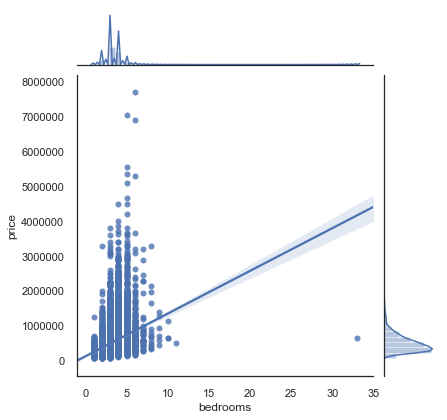

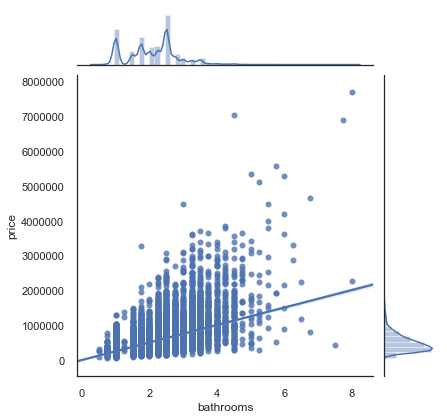

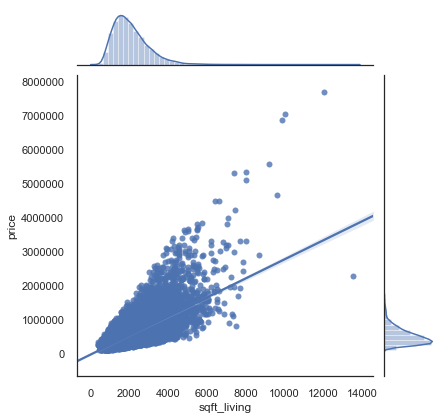

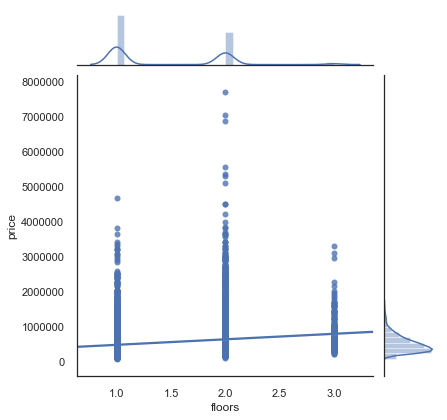

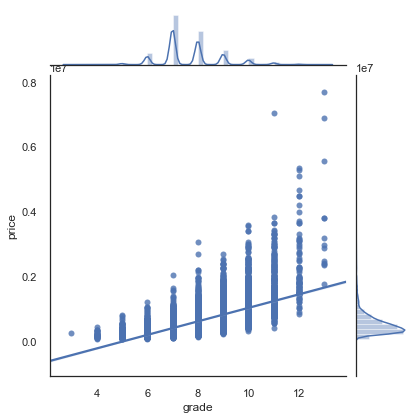

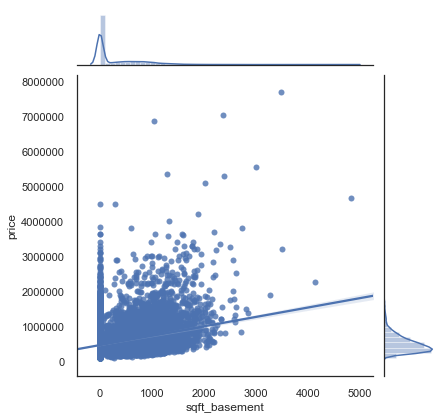

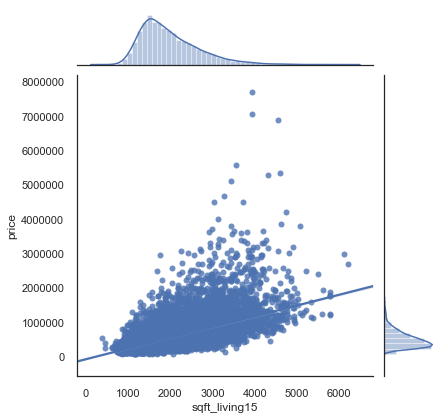

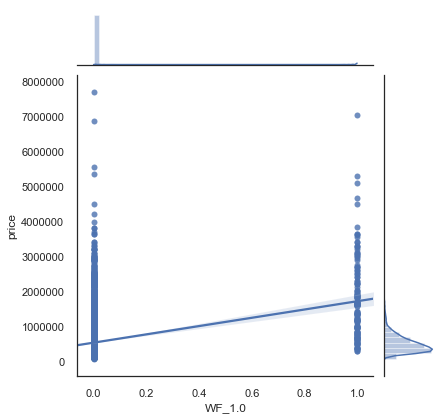

In [41]:
predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_basement', 
             'sqft_living15', 'WF_1.0']

for col in predictors:
    sns.jointplot(col,'price',data=df,kind='reg')
    plt.show()

After creating jointplots for these variables, there seems to be a significant relationship between the target variable and variables sqft_living15, bathrooms, sqft_living and grade.

In [42]:
#df.zipcode.value_counts()

In [43]:
#df.groupby('zipcode')['price'].median().sort_values()

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

target = df.price
predictors = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement','sqft_living15','WF_1.0']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     3731.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:08   Log-Likelihood:            -2.9883e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21589   BIC:                         5.977e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.206e+04   8162.934      2.702      0.007    6057.119    3.81e+04
bedrooms      -5.061e+04   2283.157    -22.166      0.000   -5.51e+04   -4.61e+04
bathrooms      1.436e+04   3771.851      3.808      0.000    6969.639    2.18e+04
sqft_living     250.8666      4.046     62.009      0.000     242.937     258.796
floors        -7287.2392   4101.204     -1.777      0.076   -1.53e+04     751.424
sqft_basement    31.9187      4.934      6.469      0.000      22.248      41.589
sqft_living15    66.6248      3.863     17.245      0.000      59.052      74.197
WF_1.0          8.21e+05   2.07e+04     39.610      0.000     7.8e+05    8.62e+05
==============================================================================
Omnibus:                    13844.450   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           503736.197
Skew:                           2.549   Prob(JB):                         0.00
Kurtosis:                      26.104   Cond. No.                     3.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We decided to remove Floors because the p value was higher than 0.05

In [45]:
target = df.price
predictors = df[['bedrooms','bathrooms','sqft_living','sqft_basement','sqft_living15','WF_1.0']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     4352.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:09   Log-Likelihood:            -2.9883e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21590   BIC:                         5.977e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.634e+04   7501.962      2.178      0.029    1633.611     3.1e+04
bedrooms      -5.015e+04   2268.823    -22.106      0.000   -5.46e+04   -4.57e+04
bathrooms      1.142e+04   3389.509      3.370      0.001    4778.251    1.81e+04
sqft_living     249.7970      4.001     62.437      0.000     241.955     257.639
sqft_basement    36.0464      4.353      8.281      0.000      27.514      44.579
sqft_living15    67.0720      3.855     17.397      0.000      59.515      74.629
WF_1.0         8.209e+05   2.07e+04     39.606      0.000     7.8e+05    8.62e+05
==============================================================================
Omnibus:                    13887.222   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           510166.990
Skew:                           2.557   Prob(JB):                         0.00
Kurtosis:                      26.255   Cond. No.                     3.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will try to improve the model by normalizing certain features

In [46]:
cols = ['bathrooms','sqft_living','sqft_living15']
df_log_normalized = df.copy()

for col in cols:
    log = np.log(df[col])
    df_log_normalized[col + '_log'] = log
    
df_log_normalized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,sqft_living15,sqft_lot15,WF_0.0,WF_1.0,age,SOLD_AGO_4,SOLD_AGO_5,bathrooms_log,sqft_living_log,sqft_living15_log
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,...,1340,5650,0,0,64,0,1,0.000000,7.073270,7.200425
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,...,1690,7639,1,0,68,0,1,0.810930,7.851661,7.432484
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,...,2720,8062,1,0,86,1,0,0.000000,6.646391,7.908387
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,...,1360,5000,1,0,54,0,1,1.098612,7.580700,7.215240
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,...,1800,7503,1,0,32,1,0,0.693147,7.426549,7.495542


In [47]:
target = df.price
predictors = df_log_normalized[['bedrooms','bathrooms','sqft_living_log','sqft_basement','sqft_living15_log','WF_1.0']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     3053.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:09   Log-Likelihood:            -3.0076e+05
No. Observations:               21597   AIC:                         6.015e+05
Df Residuals:                   21590   BIC:                         6.016e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.451e+06    5.5e+04    -62.742      0.000   -3.56e+06   -3.34e+06
bedrooms          -3.899e+04   2567.073    -15.189      0.000    -4.4e+04    -3.4e+04
bathrooms          7.581e+04   3715.639     20.403      0.000    6.85e+04    8.31e+04
sqft_living_log    2.954e+05   9554.742     30.919      0.000    2.77e+05    3.14e+05
sqft_basement        87.8860      4.688     18.747      0.000      78.697      97.075
sqft_living15_log  2.254e+05   8638.094     26.095      0.000    2.08e+05    2.42e+05
WF_1.0             9.098e+05   2.26e+04     40.237      0.000    8.66e+05    9.54e+05
==============================================================================
Omnibus:                    17631.486   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1296278.896
Skew:                           3.441   Prob(JB):                         0.00
Kurtosis:                      40.325   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we tried to perform log normalization on continuous distributions to see if it will improve R squared. It did not, although the p-values are 0s.

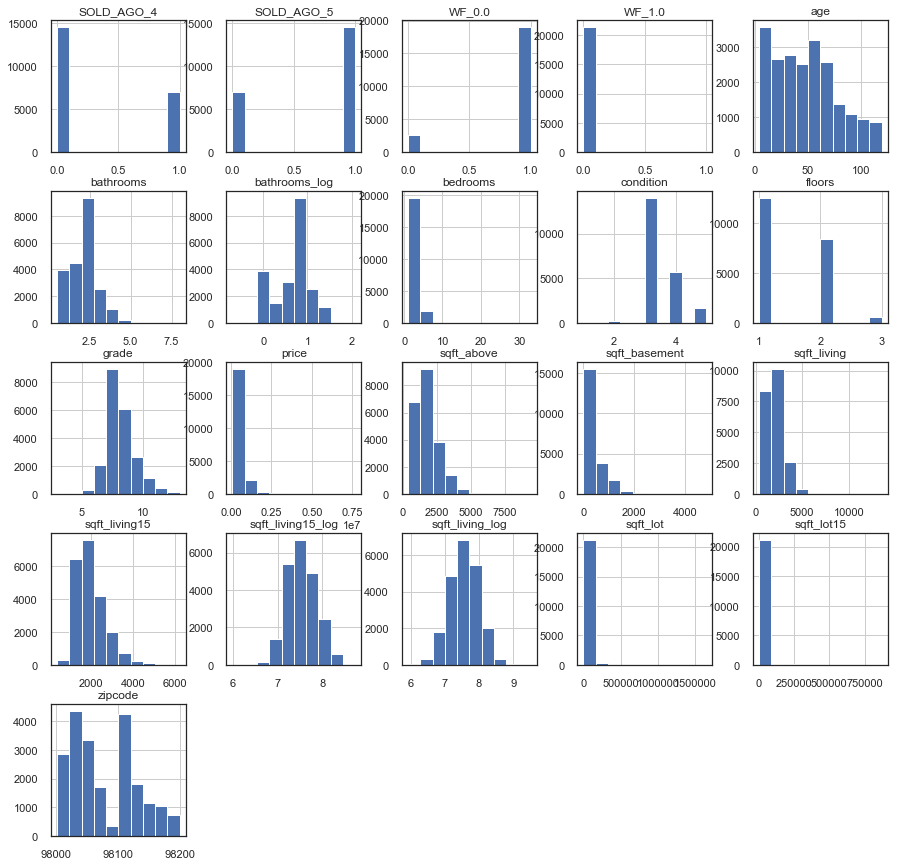

In [48]:
df_log_normalized.hist(figsize=(15,15));

Based on the histogram of the log transformation of certain features, the ditribution became more normal in the case of sqft_living15, sqft_living, and bathrooms. However, we decided to keep bathrooms as it is, because of abnormal values.

In [49]:
cols = ['bathrooms','sqft_living','sqft_living15', 'sqft_basement']
df_minmax_normalized = df_log_normalized.copy()

for col in cols:
    feat = df_minmax_normalized[col]
    minmax = (feat-min(feat))/(max(feat)-min(feat))
    df_minmax_normalized[col + '_minmax'] = minmax
    
df_minmax_normalized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,age,SOLD_AGO_4,SOLD_AGO_5,bathrooms_log,sqft_living_log,sqft_living15_log,bathrooms_minmax,sqft_living_minmax,sqft_living15_minmax,sqft_basement_minmax
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,...,64,0,1,0.000000,7.073270,7.200425,0.066667,0.061503,0.161934,0.000000
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,...,68,0,1,0.810930,7.851661,7.432484,0.233333,0.167046,0.222165,0.082988
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,...,86,1,0,0.000000,6.646391,7.908387,0.066667,0.030372,0.399415,0.000000
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,...,54,0,1,1.098612,7.580700,7.215240,0.333333,0.120729,0.165376,0.188797
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,...,32,1,0,0.693147,7.426549,7.495542,0.200000,0.099468,0.241094,0.000000


In [50]:
target = df.price
predictors = df_minmax_normalized[['bedrooms','bathrooms_minmax','sqft_living_minmax','sqft_basement_minmax','sqft_living15_minmax','WF_1.0']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     4352.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:11   Log-Likelihood:            -2.9883e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21590   BIC:                         5.977e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.412e+05   7027.205     20.098      0.000    1.27e+05    1.55e+05
bedrooms             -5.015e+04   2268.823    -22.106      0.000   -5.46e+04   -4.57e+04
bathrooms_minmax      8.566e+04   2.54e+04      3.370      0.001    3.58e+04    1.35e+05
sqft_living_minmax     3.29e+06   5.27e+04     62.437      0.000    3.19e+06    3.39e+06
sqft_basement_minmax  1.737e+05    2.1e+04      8.281      0.000    1.33e+05    2.15e+05
sqft_living15_minmax  3.898e+05   2.24e+04     17.397      0.000    3.46e+05    4.34e+05
WF_1.0                8.209e+05   2.07e+04     39.606      0.000     7.8e+05    8.62e+05
==============================================================================
Omnibus:                    13887.222   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           510166.990
Skew:                           2.557   Prob(JB):                         0.00
Kurtosis:                      26.255   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using min-max transformation on the same features that we applited the log transformation on before, we see better results. Our R value is noticable higher, while out P values are negligible.

In [51]:
type(df_minmax_normalized['bathrooms_minmax'])

pandas.core.series.Series

In [52]:
def normalize(df_column):
   return (df_column - df_column.mean())/df_column.std()

In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = df_minmax_normalized.copy()

df_scaled['bathrooms_scaled'] = normalize(df_minmax_normalized['bathrooms_minmax'])
df_scaled['sqft_living_scaled'] = normalize(df_minmax_normalized['sqft_living_minmax'])
df_scaled['sqft_living15_scaled'] = normalize(df_minmax_normalized['sqft_living15_minmax'])
df_scaled['sqft_basement_scaled'] = normalize(df_minmax_normalized['sqft_basement_minmax'])
df_scaled['bedrooms_scaled'] = normalize(df_minmax_normalized['bedrooms'])

df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,sqft_living15_log,bathrooms_minmax,sqft_living_minmax,sqft_living15_minmax,sqft_basement_minmax,bathrooms_scaled,sqft_living_scaled,sqft_living15_scaled,sqft_basement_scaled,bedrooms_scaled
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,...,7.200425,0.066667,0.061503,0.161934,0.000000,-1.451039,-0.980629,-0.943654,-0.659016,-0.402894
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,...,7.432484,0.233333,0.167046,0.222165,0.082988,0.174482,0.533357,-0.432877,0.244596,-0.402894
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,...,7.908387,0.066667,0.030372,0.399415,0.000000,-1.451039,-1.427201,1.070267,-0.659016,-1.482459
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,...,7.215240,0.333333,0.120729,0.165376,0.188797,1.149794,-0.131054,-0.914467,1.396702,0.676671
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,...,7.495542,0.200000,0.099468,0.241094,0.000000,-0.150622,-0.436030,-0.272347,-0.659016,-0.402894


In [54]:
target = df.price
predictors = df_scaled[['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled','WF_1.0']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     4352.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:11   Log-Likelihood:            -2.9883e+05
No. Observations:               21597   AIC:                         5.977e+05
Df Residuals:                   21590   BIC:                         5.977e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.347e+05   1687.822    316.827      0.000    5.31e+05    5.38e+05
bedrooms_scaled      -4.646e+04   2101.608    -22.106      0.000   -5.06e+04   -4.23e+04
bathrooms_scaled      8783.2919   2606.479      3.370      0.001    3674.400    1.39e+04
sqft_living_scaled    2.293e+05   3673.144     62.437      0.000    2.22e+05    2.37e+05
sqft_basement_scaled  1.596e+04   1926.903      8.281      0.000    1.22e+04    1.97e+04
sqft_living15_scaled  4.596e+04   2641.795     17.397      0.000    4.08e+04    5.11e+04
WF_1.0                8.209e+05   2.07e+04     39.606      0.000     7.8e+05    8.62e+05
==============================================================================
Omnibus:                    13887.222   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           510166.990
Skew:                           2.557   Prob(JB):                         0.00
Kurtosis:                      26.255   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standardizing features did not appear to have a noticible effect on the model

next step - create more dummie variables for columns where there are few numerical values 

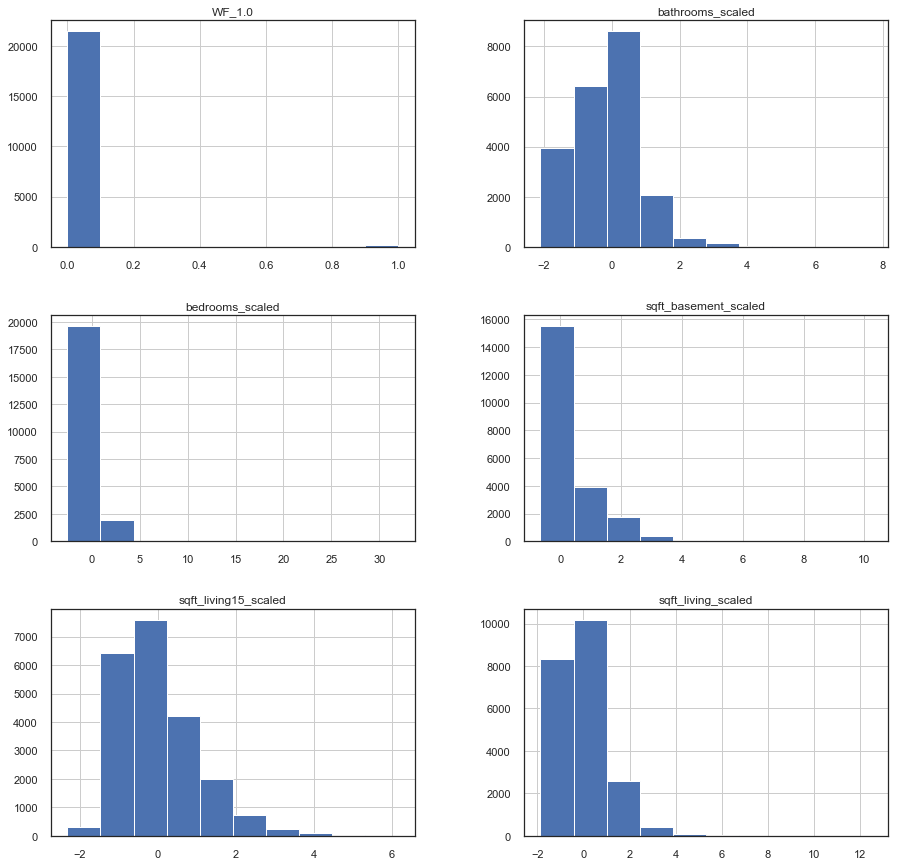

In [55]:
#assess hist for variables that are our predictors:
df_scaled[['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled','WF_1.0']].hist(figsize=(15,15));

In [56]:
df_scaled['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64



At this point there seems to be no improvement in our model. The approach is to add more variables. We will start by adding floors having binned them previously


In [57]:
floors_dummies = pd.get_dummies(df['floors'], prefix='FL_NUM')
df_scaled_with_floors = pd.concat([df_scaled, floors_dummies], axis=1)

In [58]:
target = df.price
predictors = df_scaled_with_floors[['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled',
                                    'WF_1.0', 'FL_NUM_1', 'FL_NUM_2', 'FL_NUM_3']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3343.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:12   Log-Likelihood:            -2.9869e+05
No. Observations:               21597   AIC:                         5.974e+05
Df Residuals:                   21588   BIC:                         5.975e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.269e+05   2719.786    156.974      0.000    4.22e+05    4.32e+05
bedrooms_scaled      -4.582e+04   2102.134    -21.797      0.000   -4.99e+04   -4.17e+04
bathrooms_scaled      1.442e+04   2888.680      4.992      0.000    8757.541    2.01e+04
sqft_living_scaled    2.387e+05   3723.374     64.098      0.000    2.31e+05    2.46e+05
sqft_basement_scaled  5657.5209   2227.521      2.540      0.011    1291.416       1e+04
sqft_living15_scaled  4.935e+04   2639.319     18.700      0.000    4.42e+04    5.45e+04
WF_1.0                8.154e+05   2.06e+04     39.593      0.000    7.75e+05    8.56e+05
FL_NUM_1              1.251e+05   3643.420     34.344      0.000    1.18e+05    1.32e+05
FL_NUM_2              7.305e+04   3611.679     20.226      0.000     6.6e+04    8.01e+04
FL_NUM_3              2.288e+05   7707.837     29.679      0.000    2.14e+05    2.44e+05
==============================================================================
Omnibus:                    13776.661   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496175.329
Skew:                           2.533   Prob(JB):                         0.00
Kurtosis:                      25.928   Cond. No.                     4.09e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adding floors variable improved the R squared by several points

Evaluating the predictors used in the last model:

In [59]:
#predictors = ['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled',
                                    #'WF_1.0', 'FL_NUM_1', 'FL_NUM_2', 'FL_NUM_3']
#for col in predictors:
    #sns.jointplot(col,'price',data=df_scaled_with_floors,kind='reg')
    #plt.show()
    
#a lot of variable show homeoscedasticity!!!!!!!!!



In order to account for variability for the location, we decided to see how far from Seattle downtown are the locations of the houses. Seattle downtown location established as coordinates 47.6062° N, 122.3321° W


In [60]:
#testing geopy distance calculator

from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)

538.3904453677204


In [61]:
df_complete = pd.read_csv('kc_house_data.csv')

In [62]:
df_scaled_with_floors['lat'] = df_complete['lat']

In [63]:
df_scaled_with_floors['long'] = df_complete['long']

In [64]:
df_scaled_with_floors.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,bathrooms_scaled,sqft_living_scaled,sqft_living15_scaled,sqft_basement_scaled,bedrooms_scaled,FL_NUM_1,FL_NUM_2,FL_NUM_3,lat,long
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,...,-1.451039,-0.980629,-0.943654,-0.659016,-0.402894,1,0,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,...,0.174482,0.533357,-0.432877,0.244596,-0.402894,0,1,0,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,...,-1.451039,-1.427201,1.070267,-0.659016,-1.482459,1,0,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,...,1.149794,-0.131054,-0.914467,1.396702,0.676671,1,0,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,...,-0.150622,-0.436030,-0.272347,-0.659016,-0.402894,1,0,0,47.6168,-122.045


In [65]:
seattle_downtown = (47.6062, -122.3321)

In [66]:
df_scaled_with_floors['mi_from_downtown'] = list(map(lambda x,y: geodesic(seattle_downtown,(x,y)).miles, df_scaled_with_floors['lat'],df_scaled_with_floors['long']))

In [67]:
df_scaled_with_floors.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,sqft_living_scaled,sqft_living15_scaled,sqft_basement_scaled,bedrooms_scaled,FL_NUM_1,FL_NUM_2,FL_NUM_3,lat,long,mi_from_downtown
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,...,-0.980629,-0.943654,-0.659016,-0.402894,1,0,0,47.5112,-122.257,7.443664
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,...,0.533357,-0.432877,0.244596,-0.402894,0,1,0,47.7210,-122.319,7.954648
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,...,-1.427201,1.070267,-0.659016,-1.482459,1,0,0,47.7379,-122.233,10.206394
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,...,-0.131054,-0.914467,1.396702,0.676671,1,0,0,47.5208,-122.393,6.551165
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,...,-0.436030,-0.272347,-0.659016,-0.402894,1,0,0,47.6168,-122.045,13.432452


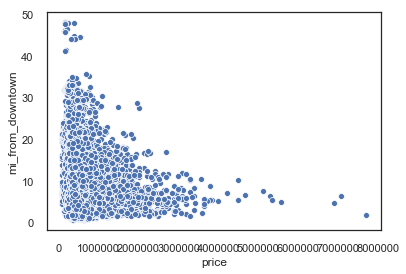

In [68]:
sns.scatterplot(df_scaled_with_floors.price, df_scaled_with_floors.mi_from_downtown)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


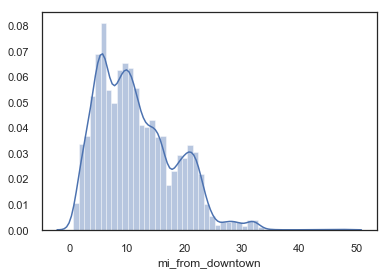

In [69]:
sns.distplot(df_scaled_with_floors.mi_from_downtown)

incorporating mi_from_seattle into our model

In [70]:
target = df.price
predictors = df_scaled_with_floors[['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled',
                                    'WF_1.0', 'FL_NUM_1', 'FL_NUM_2', 'FL_NUM_3', 'mi_from_downtown']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     4910.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:17   Log-Likelihood:            -2.9536e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21587   BIC:                         5.908e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  5.68e+05   2826.386    200.968      0.000    5.62e+05    5.74e+05
bedrooms_scaled      -4.268e+04   1802.242    -23.684      0.000   -4.62e+04   -3.92e+04
bathrooms_scaled      2.902e+04   2481.616     11.695      0.000    2.42e+04    3.39e+04
sqft_living_scaled    2.491e+05   3193.769     78.000      0.000    2.43e+05    2.55e+05
sqft_basement_scaled -3.692e+04   1969.330    -18.747      0.000   -4.08e+04   -3.31e+04
sqft_living15_scaled   5.96e+04   2265.329     26.311      0.000    5.52e+04     6.4e+04
WF_1.0                8.032e+05   1.77e+04     45.499      0.000    7.69e+05    8.38e+05
FL_NUM_1              2.276e+05   3331.922     68.323      0.000    2.21e+05    2.34e+05
FL_NUM_2               1.58e+05   3241.773     48.725      0.000    1.52e+05    1.64e+05
FL_NUM_3              1.824e+05   6627.771     27.522      0.000    1.69e+05    1.95e+05
mi_from_downtown     -2.025e+04    229.337    -88.287      0.000   -2.07e+04   -1.98e+04
==============================================================================
Omnibus:                    16110.435   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1019453.252
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      36.113   Cond. No.                     3.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

the R squared improved significantly. we will now do data transformations of our new variable:
    
    1. Log transformation
    

In [71]:
df_scaled_with_floors['mi_from_downtown_log'] = np.log(df_scaled_with_floors['mi_from_downtown'])

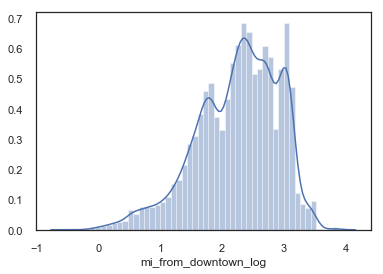

In [72]:
sns.distplot(df_scaled_with_floors.mi_from_downtown_log)

it doesn't seem to improve it. will try minmax instead

In [73]:
feature = df_scaled_with_floors['mi_from_downtown']
df_scaled_with_floors['mi_from_downtown_minmax'] = (feature-min(feature))/(max(feature)-min(feature))

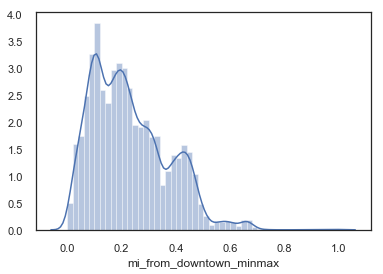

In [74]:
sns.distplot(df_scaled_with_floors.mi_from_downtown_minmax);

doesn't seem to improve the distribution either. Will try standard scaler as other variables are standardized

In [75]:
df_scaled_with_floors['mi_from_downtown_scaled'] = normalize(df_scaled_with_floors['mi_from_downtown'])



In [76]:
target = df.price
predictors = df_scaled_with_floors[['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled',
                                    'WF_1.0', 'FL_NUM_1', 'FL_NUM_2', 'FL_NUM_3', 'mi_from_downtown_scaled']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     4910.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:18   Log-Likelihood:            -2.9536e+05
No. Observations:               21597   AIC:                         5.907e+05
Df Residuals:                   21587   BIC:                         5.908e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.937e+05   2361.510    166.719      0.000    3.89e+05    3.98e+05
bedrooms_scaled         -4.268e+04   1802.242    -23.684      0.000   -4.62e+04   -3.92e+04
bathrooms_scaled         2.902e+04   2481.616     11.695      0.000    2.42e+04    3.39e+04
sqft_living_scaled       2.491e+05   3193.769     78.000      0.000    2.43e+05    2.55e+05
sqft_basement_scaled    -3.692e+04   1969.330    -18.747      0.000   -4.08e+04   -3.31e+04
sqft_living15_scaled      5.96e+04   2265.329     26.311      0.000    5.52e+04     6.4e+04
WF_1.0                   8.032e+05   1.77e+04     45.499      0.000    7.69e+05    8.38e+05
FL_NUM_1                 1.695e+05   3163.300     53.597      0.000    1.63e+05    1.76e+05
FL_NUM_2                 9.985e+04   3110.686     32.101      0.000    9.38e+04    1.06e+05
FL_NUM_3                 1.243e+05   6712.034     18.520      0.000    1.11e+05    1.37e+05
mi_from_downtown_scaled  -1.34e+05   1517.640    -88.287      0.000   -1.37e+05   -1.31e+05
==============================================================================
Omnibus:                    16110.435   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1019453.252
Skew:                           3.017   Prob(JB):                         0.00
Kurtosis:                      36.113   Cond. No.                     4.09e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

the p-values for floors are too hight. we will try to remove them


In [77]:
target = df.price
predictors = df_scaled_with_floors[['bedrooms_scaled','bathrooms_scaled','sqft_living_scaled','sqft_basement_scaled','sqft_living15_scaled',
                                    'WF_1.0', 'mi_from_downtown_scaled']]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     6194.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:18   Log-Likelihood:            -2.9550e+05
No. Observations:               21597   AIC:                         5.910e+05
Df Residuals:                   21589   BIC:                         5.911e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5.349e+05   1446.489    369.758      0.000    5.32e+05    5.38e+05
bedrooms_scaled         -4.036e+04   1802.432    -22.392      0.000   -4.39e+04   -3.68e+04
bathrooms_scaled         1.213e+04   2234.114      5.431      0.000    7754.743    1.65e+04
sqft_living_scaled       2.386e+05   3149.681     75.751      0.000    2.32e+05    2.45e+05
sqft_basement_scaled    -2.035e+04   1701.757    -11.961      0.000   -2.37e+04    -1.7e+04
sqft_living15_scaled     5.987e+04   2269.528     26.381      0.000    5.54e+04    6.43e+04
WF_1.0                   8.056e+05   1.78e+04     45.351      0.000    7.71e+05     8.4e+05
mi_from_downtown_scaled -1.327e+05   1502.409    -88.352      0.000   -1.36e+05    -1.3e+05
==============================================================================
Omnibus:                    16454.399   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1099759.013
Skew:                           3.103   Prob(JB):                         0.00
Kurtosis:                      37.404   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###


new approach: just standardize the obviously continues values, and create dummie variables for those that have few values



###

In [78]:
df_scaled_with_floors.condition.unique() #bedrooms, bathrooms, 

array([3, 5, 4, 1, 2])

In [79]:
#make dummies for bedrooms
# beds_dummies = pd.get_dummies(df['bedrooms'], prefix='NUM_BED')
# df_scaled_with_dummies = pd.concat([df_scaled_with_floors, beds_dummies], axis=1)
# df_scaled_with_dummies.head()

In [80]:
#make dummies for bedrooms
baths_dummies = pd.get_dummies(df['bathrooms'], prefix='NUM_BATH')
df_scaled_with_dummies = pd.concat([df_scaled_with_floors, baths_dummies], axis=1)
df_scaled_with_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,NUM_BATH_5.25,NUM_BATH_5.5,NUM_BATH_5.75,NUM_BATH_6.0,NUM_BATH_6.25,NUM_BATH_6.5,NUM_BATH_6.75,NUM_BATH_7.5,NUM_BATH_7.75,NUM_BATH_8.0
0,221900.0,3,1.00,1180,5650,1,3,7,1180,0.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2,3,7,2170,400.0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1,3,6,770,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1,5,7,1050,910.0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1,3,8,1680,0.0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
drop_cols = ['age','SOLD_AGO_4'
             ,'SOLD_AGO_5','bathrooms_log'
             ,'sqft_living_log','sqft_living15_log'
             ,'bathrooms_minmax','sqft_living_minmax'
             ,'sqft_living15_minmax','sqft_basement_minmax'
             ,'bathrooms_scaled'
             ,'NUM_BATH_2.25'
             ,'NUM_BATH_4.75'
             ,'NUM_BATH_5.5'
             ,'NUM_BATH_5.75'
             ,'NUM_BATH_6.25'
             ,'lat'
             ,'long'
             ,'mi_from_downtown'
             ,'mi_from_downtown_minmax'
             ,'mi_from_downtown_scaled']
df_ols = df_scaled_with_dummies.loc[:,'WF_1.0':].drop(drop_cols,axis=1)
df_ols.head()

,WF_1.0,sqft_living_scaled,sqft_living15_scaled,sqft_basement_scaled,bedrooms_scaled,FL_NUM_1,FL_NUM_2,FL_NUM_3,mi_from_downtown_log,NUM_BATH_0.5,...,NUM_BATH_4.25,NUM_BATH_4.5,NUM_BATH_5.0,NUM_BATH_5.25,NUM_BATH_6.0,NUM_BATH_6.5,NUM_BATH_6.75,NUM_BATH_7.5,NUM_BATH_7.75,NUM_BATH_8.0
0,0,-0.980629,-0.943654,-0.659016,-0.402894,1,0,0,2.007363,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.533357,-0.432877,0.244596,-0.402894,0,1,0,2.073756,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-1.427201,1.070267,-0.659016,-1.482459,1,0,0,2.323014,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.131054,-0.914467,1.396702,0.676671,1,0,0,1.879643,0,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.436030,-0.272347,-0.659016,-0.402894,1,0,0,2.597674,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
beds_baths = ['NUM_BATH_2.25'
             ,'NUM_BATH_4.75'
             ,'NUM_BATH_5.5'
             ,'NUM_BATH_5.75'
             ,'NUM_BATH_6.25'
             ,'lat'
             ,'long'
             ,'mi_from_downtown'
             ,'mi_from_downtown_minmax'
             ,'mi_from_downtown_scaled']
#              ,'NUM_BED_6'
#              ,'NUM_BED_8'
#              ,'NUM_BED_9'
#              ,'NUM_BED_10'
#              ,'NUM_BED_11'
#              ,'NUM_BED_33']

In [83]:
target = df.price
predictors = df_ols

predictors_int = sm.add_constant(predictors)
model = sm.OLS(target, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1589.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:34:18   Log-Likelihood:            -2.9431e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21564   BIC:                         5.889e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  7.59e+05   5156.295    147.199      0.000    7.49e+05    7.69e+05
WF_1.0                8.126e+05   1.69e+04     48.088      0.000    7.79e+05    8.46e+05
sqft_living_scaled    2.365e+05   3093.458     76.459      0.000     2.3e+05    2.43e+05
sqft_living15_scaled  7.555e+04   2202.269     34.306      0.000    7.12e+04    7.99e+04
sqft_basement_scaled -3.591e+04   1923.555    -18.667      0.000   -3.97e+04   -3.21e+04
bedrooms_scaled      -3.176e+04   1741.063    -18.239      0.000   -3.52e+04   -2.83e+04
FL_NUM_1              2.865e+05   3991.821     71.784      0.000    2.79e+05    2.94e+05
FL_NUM_2              2.288e+05   3488.345     65.577      0.000    2.22e+05    2.36e+05
FL_NUM_3              2.437e+05   6341.067     38.431      0.000    2.31e+05    2.56e+05
mi_from_downtown_log -2.077e+05   2259.501    -91.916      0.000   -2.12e+05   -2.03e+05
NUM_BATH_0.5         -1.282e+05      1e+05     -1.276      0.202   -3.25e+05    6.87e+04
NUM_BATH_0.75        -3.314e+04   2.46e+04     -1.349      0.177   -8.13e+04     1.5e+04
NUM_BATH_1.0         -1.802e+04   6386.235     -2.821      0.005   -3.05e+04   -5500.967
NUM_BATH_1.25        -5.616e+04   6.71e+04     -0.837      0.403   -1.88e+05    7.54e+04
NUM_BATH_1.5         -2.796e+04   7152.763     -3.909      0.000    -4.2e+04   -1.39e+04
NUM_BATH_1.75        -2.352e+04   6008.682     -3.915      0.000   -3.53e+04   -1.17e+04
NUM_BATH_2.0         -2.841e+04   6555.510     -4.333      0.000   -4.13e+04   -1.56e+04
NUM_BATH_2.5         -4.568e+04   5300.836     -8.618      0.000   -5.61e+04   -3.53e+04
NUM_BATH_2.75        -4.412e+04   7407.719     -5.955      0.000   -5.86e+04   -2.96e+04
NUM_BATH_3.0         -3.158e+04   8676.847     -3.640      0.000   -4.86e+04   -1.46e+04
NUM_BATH_3.25         5.694e+04   9741.542      5.845      0.000    3.78e+04     7.6e+04
NUM_BATH_3.5          8560.3645   9170.242      0.933      0.351   -9413.989    2.65e+04
NUM_BATH_3.75         1.279e+05   1.72e+04      7.455      0.000    9.43e+04    1.62e+05
NUM_BATH_4.0           1.19e+05   1.83e+04      6.493      0.000    8.31e+04    1.55e+05
NUM_BATH_4.25         2.339e+05   2.37e+04      9.871      0.000    1.87e+05     2.8e+05
NUM_BATH_4.5          1.151e+05   2.13e+04      5.414      0.000    7.34e+04    1.57e+05
NUM_BATH_5.0          3.568e+05   4.44e+04      8.028      0.000     2.7e+05    4.44e+05
NUM_BATH_5.25         4.277e+05   5.62e+04      7.606      0.000    3.18e+05    5.38e+05
NUM_BATH_6.0          1.133e+06   8.27e+04     13.709      0.000    9.71e+05     1.3e+06
NUM_BATH_6.5          1.935e+05   1.43e+05      1.358      0.174   -8.58e+04    4.73e+05
NUM_BATH_6.75          3.21e+05   1.43e+05      2.242      0.025    4.04e+04    6.02e+05
NUM_BATH_7.5         -7.013e+05   2.01e+05     -3.488    

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt

def rmse(y_actual,y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

In [100]:
model = LinearRegression()
y = df.price
X = df_ols.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse(y_test,y_pred)
# residuals = y_test - y_pred
# squared_error = residuals ** 2
# mse = squared_error.mean()
# sqrt(mse)

222793.40497965566